# Sentiment analysis using News Headlines

In [2]:
import pandas as pd
news = pd.read_csv('/content/data.csv')
news.sample(10)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
339,90026,NaN,Stereogum,Chris DeVille,Yumi Zouma – “be okay”,New Zealand indie-pop greats Yumi Zouma return...,https://www.stereogum.com/2238662/yumi-zouma-b...,https://static.stereogum.com/uploads/2023/10/c...,2023-10-11 13:26:12.000000,New Zealand indie-pop greats Yumi Zouma return...,New Zealand,NaN
421,90119,NaN,CNET,Kevin Lynch,How to Watch the 2023 Cricket World Cup Live F...,Six-week of ODI action as the world's best tea...,https://www.cnet.com/tech/services-and-softwar...,https://www.cnet.com/a/img/resize/5c192a45e44f...,2023-10-05 06:30:05.000000,"Spanning six weeks and 48 games, the festival ...",New Zealand,NaN
180,89828,NaN,CNET,Kevin Lynch,Rugby World Cup 2023 Final Livestream: How to ...,The Webb Ellis Trophy is up for grabs in Paris...,https://www.cnet.com/tech/services-and-softwar...,https://www.cnet.com/a/img/resize/72e167214c07...,2023-10-28 17:00:08.000000,After seven weeks of high-octane rucking actio...,New Zealand,NaN
402,90096,al-jazeera-english,Al Jazeera English,Al Jazeera,Australian Aboriginal child separation at ‘dev...,UN Indigenous experts are visiting Australia w...,https://www.aljazeera.com/news/2023/10/5/austr...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-05 04:44:21.000000,An Aboriginal Commissioner has warned that Aus...,New Zealand,UN Indigenous experts are visiting Australia w...
376,90067,NaN,The Indian Express,Venkata Krishna B,Cricket World Cup: Comeback king Kane Williams...,"After bowlers restrict Bangla Tigers to 245, r...",https://indianexpress.com/article/sports/crick...,https://images.indianexpress.com/2023/10/Kane-...,2023-10-13 18:57:16.000000,Black is an inescapable colour in Chennai. It ...,New Zealand,Black is an inescapable colour in Chennai. It ...
351,90040,business-insider,Business Insider,"Aaron Mok,Lakshmi Varanasi",Gen Z is lonely. Going back to the office may ...,Some Gen Z workers are craving in-person conne...,https://www.businessinsider.com/cure-for-gen-z...,https://i.insider.com/653be8ff96f7540cd067d251...,2023-10-31 08:40:01.000000,Arantza Pena Popo/Insider\nBen Fitchett didn't...,New Zealand,Ben Fitchett didn't realize how difficult it w...
190,89842,NaN,ReadWrite,Radek Zielinski,Twitter confirms upcoming ad-supported and ad-...,Twitter is poised to roll out multiple new sub...,https://readwrite.com/twitter-ad-supported-ad-...,https://readwrite.com/wp-content/uploads/2023/...,2023-10-21 13:00:13.000000,Twitter is poised to roll out multiple new sub...,New Zealand,Twitter is poised to roll out multiple new sub...
321,90007,NaN,The Indian Express,Tech Desk,"Musk to launch new subscription plans for X, o...",The move comes after X started experimenting w...,https://indianexpress.com/article/technology/t...,https://images.indianexpress.com/2023/10/x-soc...,2023-10-21 12:38:17.000000,"X, the social media platform formerly known as...",New Zealand,"X, the social media platform formerly known as..."
369,90060,bbc-news,BBC News,NaN,Wyrwas makes first England start as WXV1 kicks...,Scrum-half Ella Wyrwas will make her first sta...,https://www.bbc.co.uk/sport/rugby-union/67131996,https://ichef.bbci.co.uk/live-experience/cps/6...,2023-10-17 08:50:50.000000,Ella Wyrwas featured three times as replacemen...,New Zealand,NaN
121,89751,NaN,NDTV News,NaN,10 Nepali Students Killed In Hamas Attack In I...,As many as 10 Nepali students were confirmed d...,https://www.ndtv.com/world-news/10-nepali-stud...,https://c.ndtvimg.com/2023-10/jk539d18_israel-...,2023-10-08 17:14:57.000000,Kathmandu: As many as 10 Nepali students were ...,Nepal,NaN


In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_id    424 non-null    int64 
 1   source_id     177 non-null    object
 2   source_name   424 non-null    object
 3   author        294 non-null    object
 4   title         424 non-null    object
 5   description   424 non-null    object
 6   url           424 non-null    object
 7   url_to_image  415 non-null    object
 8   published_at  423 non-null    object
 9   content       423 non-null    object
 10  category      423 non-null    object
 11  full_content  122 non-null    object
dtypes: int64(1), object(11)
memory usage: 39.9+ KB


In [5]:
news=news.drop(news['published_at']["2023-11-02 09"])

KeyError: '2023-11-02 09'

In [6]:
news['published_at']=pd.to_datetime(news['published_at'])
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   article_id    424 non-null    int64         
 1   source_id     177 non-null    object        
 2   source_name   424 non-null    object        
 3   author        294 non-null    object        
 4   title         424 non-null    object        
 5   description   424 non-null    object        
 6   url           424 non-null    object        
 7   url_to_image  415 non-null    object        
 8   published_at  423 non-null    datetime64[ns]
 9   content       423 non-null    object        
 10  category      423 non-null    object        
 11  full_content  122 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 39.9+ KB


In [7]:
news.shape

(424, 12)

In [8]:
len(news['category'].unique())

7

In [9]:
news['category'].value_counts()


category
New Zealand       257
Nepal             162
Hiking              1
Sustainability      1
Europe              1
Oman                1
Name: count, dtype: int64

In [12]:
news.dropna(inplace=True)

news.drop_duplicates(inplace=True)

In [ ]:
# # Function to split 'headline_category' into subcategories
# def split_headline_category(df, column_name):
#     # Split the text by full stops
#     split_data = df[column_name].str.split('.', expand=True)

#     # Rename the new columns
#     split_data.columns = [f'sub_cat{i+1}' for i in range(split_data.shape[1])]

#     # Concatenate the original DataFrame with the new columns
#     result_df = pd.concat([df, split_data], axis=1)

#     return result_df

# # Apply the function to the 'headline_category' column
# news_df = split_headline_category(news, 'headline_category')

# # Print the resulting DataFrame
# news_df.sample(10)

In [13]:
news.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
6,89551,al-jazeera-english,Al Jazeera English,Kaushik Raj,Pro-Israel rallies allowed in India but Palest...,"India, the first non-Arab country to recognise...",https://www.aljazeera.com/news/2023/10/25/pro-...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-25 09:58:17,"New Delhi, India Israels relentless bombing of...",Nepal,"India, the first non-Arab country to recognise..."
12,89563,the-times-of-india,The Times of India,Durgesh Nandan Jha,PM Hasina’s war on terror gets daughter India’...,India News: NEW DELHI: India preferred Banglad...,https://timesofindia.indiatimes.com/india/pm-h...,"https://static.toiimg.com/thumb/msid-47529300,...",2023-11-02 01:12:47,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...
21,89584,rt,RT,RT,India leads in migration to 'high-income' coun...,"US, Australia and Canada were the top destinat...",https://www.rt.com/india/585738-indians-migrat...,https://mf.b37mrtl.ru/files/2023.10/article/65...,2023-10-25 06:46:38,India topped a chart of countries with the lar...,Nepal,India has topped a list of countries with the ...
31,89602,rt,RT,RT,India rejects its ranking in Global Hunger Ind...,New Delhi labelled index as “an erroneous meas...,https://www.rt.com/india/584837-india-rejects-...,https://mf.b37mrtl.ru/files/2023.10/article/65...,2023-10-13 14:33:26,The Indian government has rejected the new edi...,Nepal,The Indian government has rejected the new ed...
35,89614,abc-news,ABC News,The Associated Press,A 5.2 magnitude earthquake in Nepal damages do...,A 5.2 magnitude earthquake and some aftershock...,https://abcnews.go.com/International/wireStory...,https://s.abcnews.com/images/US/abc_news_defau...,2023-10-22 15:34:02,"KATHMANDU, Nepal -- A 5.2 magnitude earthquake...",Nepal,"KATHMANDU, Nepal --A 5.2 magnitudeearthquakean..."


In [14]:
import spacy
from nltk.corpus import stopwords
import string
import nltk
import nltk.tokenize
from tqdm import tqdm_notebook as tqdm

In [15]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
nlp = spacy.load('en_core_web_sm')

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [18]:
def get_sentiment(text):
    blob=TextBlob(text)
    return blob.sentiment.polarity

news['sentiment_textblob_text']=news['description'].apply(get_sentiment)
news['sentiment_textblob_category']=news['full_content'].apply(get_sentiment)

news.sample(10)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,sentiment_textblob_text,sentiment_textblob_category
158,89797,the-times-of-india,The Times of India,PTI,Nepal quake triggered Sikkim disaster? Scienti...,Scientists are investigating whether the recen...,https://economictimes.indiatimes.com/news/indi...,"https://img.etimg.com/thumb/msid-104166857,wid...",2023-10-04 16:44:54,Scientists are exploring whether the strong ea...,Nepal,Agencies Scientists are exploring whether the ...,0.000000,0.039185
333,90018,business-insider,Business Insider,Zoe Burt,'Girl math' is toxic and it could be holding w...,A financial-content specialist breaks down why...,https://www.businessinsider.com/why-girl-math-...,https://i.insider.com/65295e396561dd877e7a09f1...,2023-10-18 09:12:15,Money in the MetaverseWe Are/Getty Images\n<ul...,New Zealand,Women are constantly being reminded that math ...,-0.077778,0.084514
143,89780,bbc-news,BBC News,https://www.facebook.com/bbcnews,"Israel attack: 12 Thai nationals killed, 11 ki...","30,000 Thai nationals work in Israel, and Thai...",https://www.bbc.co.uk/news/world-asia-67052021,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-09 08:59:08,Twelve Thais have been killed and another 11 k...,Nepal,Twelve Thais have been killed and another 11 k...,0.800000,0.076852
193,89845,bbc-news,BBC News,https://www.facebook.com/bbcnews,MI5 fears Israel-Gaza war could fuel radicalis...,The UK intelligence boss says his agency is wa...,https://www.bbc.co.uk/news/uk-67137323,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-17 19:51:51,MI5 is monitoring for increased risks to the U...,New Zealand,MI5 is monitoring for increased risks to the U...,0.214286,0.076980
152,89791,rt,RT,RT,Ayodhya’s reincarnation: Massive temple constr...,Lord Rama’s birthplace will welcome internatio...,https://www.rt.com/india/585882-india-renewal-...,https://mf.b37mrtl.ru/files/2023.10/article/65...,2023-10-27 08:35:15,"Ayodhya, an ancient Indian holy city on the ba...",Nepal,"Ayodhya, an ancient Indian holy city on the ba...",0.383333,0.047617
239,89907,al-jazeera-english,Al Jazeera English,Al Jazeera,Musk to charge new X users $1 a year for basic...,New users in the Philippines and New Zealand a...,https://www.aljazeera.com/news/2023/10/18/musk...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-18 02:54:09,"X, the social media site formerly known as Twi...",New Zealand,New users in the Philippines and New Zealand a...,0.255682,0.121310
135,89769,the-times-of-india,The Times of India,ET Now,"Positive on Q3 due to deferred festive demand,...",“We have done well in the Middle East market a...,https://economictimes.indiatimes.com/markets/e...,"https://img.etimg.com/thumb/msid-104811833,wid...",2023-10-30 03:49:31,"Amit Syngle, MD &amp; CEO, Asian Paints, says ...",Nepal,"ETMarkets.com Amit Syngle , MD & CEO, Asian P...",-0.060000,0.108611
258,89931,business-insider,Business Insider,Dan DeFrancesco,Goldman exec exits revealed,Insider analysis of partner exits under CEO Da...,https://www.businessinsider.com/news-today-oct...,https://i.insider.com/653ac22e96f7540cd0670975...,2023-10-27 14:10:49,David Solomon at Goldman Sachs' 2023 investor ...,New Zealand,Happy Friday!If you're a big fan of Céline Di...,0.600000,0.129441
192,89844,business-insider,Business Insider,Tom Carter,Musk adds yet more complexity to X with new pa...,The X owner confirmed reports that the social ...,https://www.businessinsider.com/elon-musk-to-l...,https://i.insider.com/653244ab96f7540cd0613ea9...,2023-10-20 10:06:25,Elon Musk said that the new X premium tiers wo...,New Zealand,Elon Musk has announced that X is launching tw...,0.216667,0.057107
223,89885,al-jazeera-english,Al Jazeera English,Al Jazeera,New Zealand beat Ireland in epic Rugby World C...,"New Zealand prevailed 28-24 over Ireland, deny...",https://www.aljazeera.com/sports/2023/10/15/ne...,https://www.aljazeera.com/wp-cont

In [20]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

news['sentiment_vader_text'] = news['description'].apply(get_vader_sentiment)

news['sentiment_vader_category'] = news['full_content'].apply(get_vader_sentiment)

news.sample(10)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,sentiment_textblob_text,sentiment_textblob_category,sentiment_vader_text,sentiment_vader_category
323,90009,bbc-news,BBC News,https://www.facebook.com/bbcnews,Australian man rowing across Pacific Ocean res...,"Tom Robinson, 24, had been hoping to become th...",https://www.bbc.co.uk/news/world-australia-670...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-06 10:38:13,A man attempting to row across the Pacific Oce...,New Zealand,A man attempting to row across the Pacific Oce...,0.000000,0.224148,0.4215,0.9763
12,89563,the-times-of-india,The Times of India,Durgesh Nandan Jha,PM Hasina’s war on terror gets daughter India’...,India News: NEW DELHI: India preferred Banglad...,https://timesofindia.indiatimes.com/india/pm-h...,"https://static.toiimg.com/thumb/msid-47529300,...",2023-11-02 01:12:47,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...,0.136364,0.072011,0.0000,0.8934
224,89887,al-jazeera-english,Al Jazeera English,Lyndal Rowlands,Minor parties could hold key to New Zealand el...,Polls put New Zealand’s National party ahead o...,https://www.aljazeera.com/news/2023/10/11/mino...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-11 23:18:35,The National partys Christopher Luxon is leadi...,New Zealand,Polls put New Zealand’s National party ahead o...,0.043182,0.104997,0.1027,0.9963
172,89820,the-verge,The Verge,Jay Peters,Instagram tests a verified-only feed,Instagram is testing a toggle that lets you on...,https://www.theverge.com/2023/10/23/23929100/i...,https://cdn.vox-cdn.com/thumbor/I0QylCJuAEqWEK...,2023-10-23 18:46:06,Instagram tests a verified-only feed\nInstagra...,New Zealand,Instagram is testing a toggle that lets you on...,0.000000,0.144276,0.0000,0.8777
170,89818,the-verge,The Verge,Emma Roth,X launches two new subscriptions to boost your...,"X, formerly Twitter, is introducing two new su...",https://www.theverge.com/2023/10/27/23935317/x...,https://cdn.vox-cdn.com/thumbor/97YL7dtY5kymZm...,2023-10-27 19:07:19,X launches two new subscriptions to boost your...,New Zealand,"X, the platform previously known as Twitter, h...",0.034091,0.079230,0.4019,0.3400
201,89857,business-insider,Business Insider,gglover@insider.com (George Glover),Cricket-mad India is hosting the World Cup – a...,A former derivatives trader told Bloomberg he'...,https://www.businessinsider.com/cricket-world-...,https://i.insider.com/6527ec3255f52b01b35dad92...,2023-10-13 08:41:14,Cricket-mad India is currently hosting the spo...,New Zealand,Cricket-mad India is currently hosting the spo...,0.125000,0.030319,0.5719,-0.9244
204,89860,al-jazeera-english,Al Jazeera English,Al Jazeera,Conservative Christopher Luxon to form new gov...,The National Party secured about 40 percent of...,https://www.aljazeera.com/news/2023/10/14/cons...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-14 13:04:20,Conservative businessman Christopher Luxon and...,New Zealand,The National Party secured about 40 percent of...,0.136364,0.074765,0.6597,0.9930
333,90018,business-insider,Business Insider,Zoe Burt,'Girl math' is toxic and it could be holding w...,A financial-content specialist breaks down why...,https://www.businessinsider.com/why-girl-math-...,https://i.insider.com/65295e396561dd877e7a09f1...,2023-10-18 09:12:15,Money in the MetaverseWe Are/Getty Images\n<ul...,New Zealand,Women are constantly being reminded that math ...,-0.077778,0.084514,-0.5106,0.9535
35,89614,abc-news,ABC News,The Associated Press,A 5.2 magnitude earthquake in Nepal damages do...,A 5.2 magnitude earthquake and some aftershock...,https://abcnews.go.com/International/wireStory...,https://s.abcnews.com/images/US/abc_news_defau...,2023-10-22 15:34:02,"KATHMANDU, Nepal -- A 5.2 magnitude earthquake...",Nepal,"KATHMANDU, Nepal --A 5.2 magnitudeearthquakean...",0.100000,0.000000,-0.4404,-0.9349
126

In [21]:
def categorize_sentiment(polarity):
    if polarity>0.1:
        return 'positive'
    elif polarity<-0.1:
        return 'negative'
    else:
        return 'neutral'


news['sentiment_category_text_textblob']=news['sentiment_textblob_text'].apply(categorize_sentiment)
news['sentiment_category_text_textblob']=news['sentiment_vader_category'].apply(categorize_sentiment)

news['sentiment_category_category_textblob']=news['sentiment_textblob_text'].apply(categorize_sentiment)
news['sentiment_category_category_textblob']=news['sentiment_vader_category'].apply(categorize_sentiment)


news.sample(10)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,sentiment_textblob_text,sentiment_textblob_category,sentiment_vader_text,sentiment_vader_category,sentiment_category_text_textblob,sentiment_category_category_textblob
333,90018,business-insider,Business Insider,Zoe Burt,'Girl math' is toxic and it could be holding w...,A financial-content specialist breaks down why...,https://www.businessinsider.com/why-girl-math-...,https://i.insider.com/65295e396561dd877e7a09f1...,2023-10-18 09:12:15,Money in the MetaverseWe Are/Getty Images\n<ul...,New Zealand,Women are constantly being reminded that math ...,-0.077778,0.084514,-0.5106,0.9535,positive,positive
170,89818,the-verge,The Verge,Emma Roth,X launches two new subscriptions to boost your...,"X, formerly Twitter, is introducing two new su...",https://www.theverge.com/2023/10/27/23935317/x...,https://cdn.vox-cdn.com/thumbor/97YL7dtY5kymZm...,2023-10-27 19:07:19,X launches two new subscriptions to boost your...,New Zealand,"X, the platform previously known as Twitter, h...",0.034091,0.079230,0.4019,0.3400,positive,positive
118,89742,cnn,CNN,Reuters,Death toll from flash floods in Indian Himalay...,The death toll from flash floods unleashed by ...,https://www.cnn.com/2023/10/09/asia/india-floo...,https://media.cnn.com/api/v1/images/stellar/pr...,2023-10-09 11:58:50,The death toll from flash floods unleashed by ...,Nepal,The death toll from flash floodsunleashed by a...,-0.200000,0.043858,-0.7964,-0.9777,negative,negative
102,89717,abc-news,ABC News,The Associated Press,AP Week in Pictures: Asia,"Oct. 6-13, 2023\n\nIndians in traditional atti...",https://abcnews.go.com/International/wireStory...,https://i.abcnewsfe.com/a/5ac1ddb7-358d-416f-b...,2023-10-13 04:14:58,"Oct. 6-13, 2023\nIndians in traditional attire...",Nepal,"Oct. 6-13, 2023 Indians in traditional attire ...",0.133333,0.118750,0.1280,0.0498,neutral,neutral
223,89885,al-jazeera-english,Al Jazeera English,Al Jazeera,New Zealand beat Ireland in epic Rugby World C...,"New Zealand prevailed 28-24 over Ireland, deny...",https://www.aljazeera.com/sports/2023/10/15/ne...,https://www.aljazeera.com/wp-content/uploads/2...,2023-10-15 09:06:09,Three-time champions New Zealand inflicted mor...,New Zealand,"New Zealand prevailed 28-24 over Ireland, brea...",0.068182,0.113525,-0.3400,0.9046,positive,positive
185,89833,bbc-news,BBC News,https://www.facebook.com/bbcnews,South Africa declares public holiday for World...,The President said the rugby win should be see...,https://www.bbc.co.uk/news/world-africa-67269427,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-10-30 22:38:04,South African President Cyril Ramaphosa has de...,New Zealand,South African President Cyril Ramaphosa has de...,0.800000,0.224842,0.7717,0.9691,positive,positive
135,89769,the-times-of-india,The Times of India,ET Now,"Positive on Q3 due to deferred festive demand,...",“We have done well in the Middle East market a...,https://economictimes.indiatimes.com/markets/e...,"https://img.etimg.com/thumb/msid-104811833,wid...",2023-10-30 03:49:31,"Amit Syngle, MD &amp; CEO, Asian Paints, says ...",Nepal,"ETMarkets.com Amit Syngle , MD & CEO, Asian P...",-0.060000,0.108611,0.5413,0.9990,positive,positive
158,89797,the-times-of-india,The Times of India,PTI,Nepal quake triggered Sikkim disaster? Scienti...,Scientists are investigating whether the recen...,https://economictimes.indiatimes.com/news/indi...,"https://img.etimg.com/thumb/msid-104166857,wid...",2023-10-04 16:44:54,Scientists are exploring whether the strong ea...,Nepal,Agencies Scientists are exploring whether the ...,0.000000,0.039185,0.0000,-0.9987,negative,negative
279,89954,al-jazeera-english,Al Jazeera English,Al Jazeera,South Africa beat New Zealand by 190 runs in I...,Quinton de Kock and Rassie Van der Dussen's ce...,https://www.aljazeera.com/sports/2023/11/1/sou...,https://www.aljazeera.com/wp-content/uploads/2...,2023-11-01 15:44:55,Sou

In [22]:
news['sentiment_category_text_textblob'].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

In [23]:
comparison = news['sentiment_category_category_textblob']==news['sentiment_category_text_textblob']
comparison.value_counts()

True    55
Name: count, dtype: int64

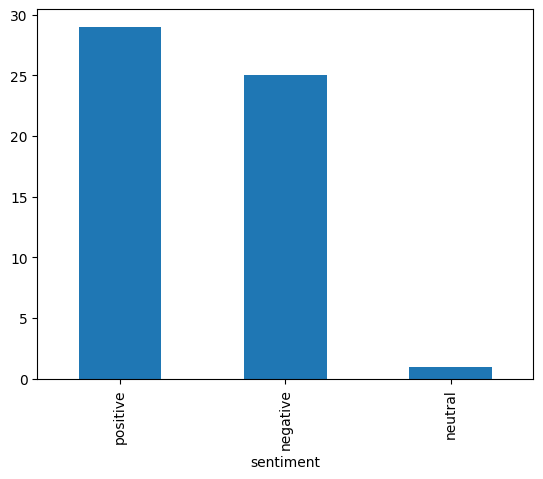

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = news['sentiment_category_text_textblob'].value_counts().plot(kind='bar', xlabel='sentiment')
ax.figsize=(12,8)